In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss

# Para evitar a confusão da aula passada, colocando alguns defaults!
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()

plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [4]:
np.random.seed(98)

# Aula 07 - Risco

Vamos iniciar esta aula com um conjunto de dados sintéticos. Os mesmos vão ser compostos de uma amostra de uma distribuição Normal. Para fazer tal amostra, use a biblioteca `numpy.random`. Abaixo, nossos dados são gerados a partir de uma distribuição Beta.

In [5]:
data = np.random.beta(3, 2, size=50)

Agora, vamos visualizar os dados. Observe alguns pontos:

1. Dos dados apenas não sabemos a distribuição.
1. Parece um pouco com uma coisa multimodal, mas não é.
1. Sabemos que não é! Pois geramos uma beta.

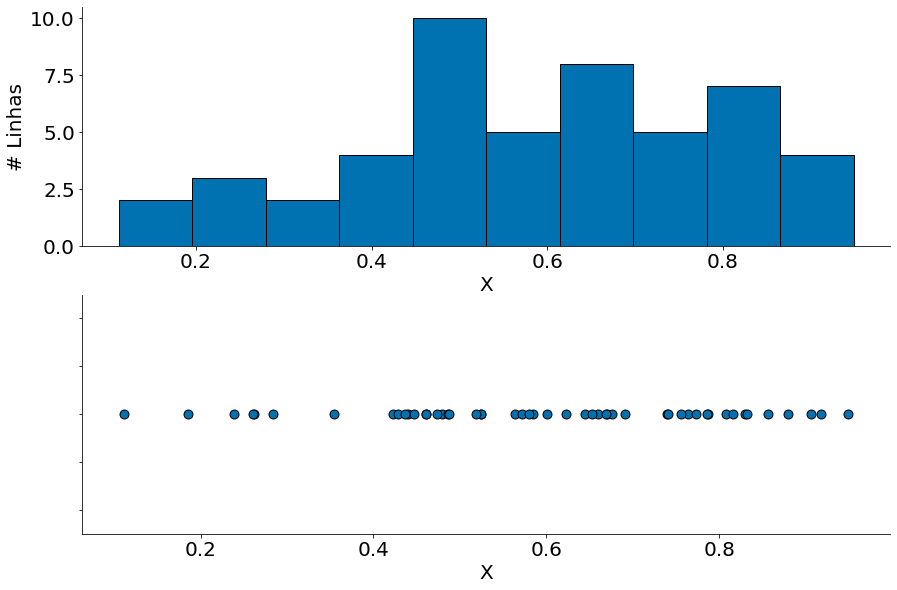

In [6]:
plt.subplot(2, 1, 1)
plt.hist(data, edgecolor='k');
plt.ylabel('# Linhas')
plt.xlabel('X')
despine()

plt.subplot(2, 1, 2)
plt.scatter(data, np.ones(len(data)), s=80, edgecolor='k')
ax = plt.gca()
ax.set_yticklabels([])
plt.xlabel('X')
despine()

plt.tight_layout(pad=0)

### Lei dos Grandes Números

**Do Wikipedia:** A lei dos grandes números (LGN) é um teorema fundamental da teoria da probabilidade, que descreve o resultado da realização da mesma experiência repetidas vezes. De acordo com a LGN, a média aritmética dos resultados da realização da mesma experiência repetidas vezes tende a se aproximar do valor esperado à medida que mais tentativas se sucederem. Em outras palavras, quanto mais tentativas são realizadas, mais a probabilidade da média aritmética dos resultados observados irá se aproximar da probabilidade real.

A prova da lei dos grandes números requer um conhecimento da [Desigualdade de Chebyshev](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality). Não vamos provar no curso. Os que fizerem probabilidade devem conhecer a prova. Caso não tenha feito, não se preocupe, não vamos precisar fazer a prova na mão. Precisamos apenas saber do enunciado:

Considerando $X_1, X_2, \cdots X_n$ uma sequência infinita de variáveis aleatórias i.i.d. com valor esperado $E[X_i]  = E[X_{i-1}]$ = $\mu$. Além do mais, a média amostral de cada VA é: $\overline{X}_n=\frac1n(X_1+\cdots+X_n)$.

A lei dos grandos números fala que:
$$\lim_{n \to \infty} P\left ( \left| \overline{X}_n - \mu \right | < \varepsilon \right ) = 1$$

Abaixos vamos ver a mesma! Do primeiro plot observe como a média converge com mais amostras.

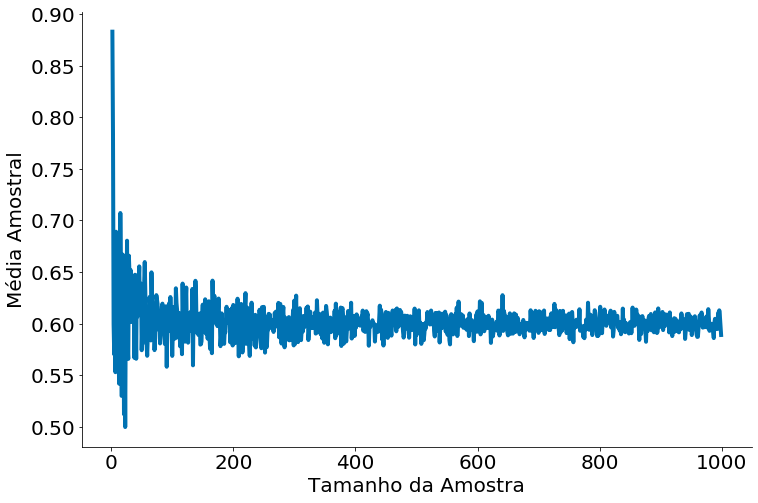

In [16]:
mu = 3 / (3 + 5)
xax = np.arange(2, 1000)
yax = []
diff = []
for size in xax:
    data = np.random.beta(3, 2, size=size)
    yax.append(data.mean())
    diff.append((mu - data.mean()) ** 2) # Diferença ao quadrado
plt.plot(xax, yax)
plt.ylabel('Média Amostral')
plt.xlabel('Tamanho da Amostra')
despine()

Abaixo temos o erro ao quadrado. Note que nunca é zero. A lei não fala isto, fala que a distância fica dentro de um epsilon.

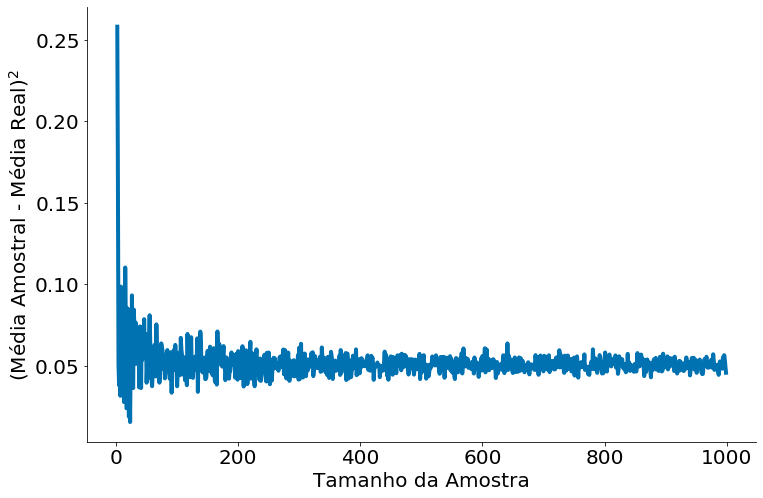

In [18]:
plt.plot(xax, diff)
plt.ylabel('(Média Amostral - Média Real)$^2$')
plt.xlabel('Tamanho da Amostra')
despine()

### Valor Esperado do Estimador

Observe que nosso ponto de partida foi uma única amostra. Podemos gerar várias delas! Para cada uma, temos um estimador diferente. Abaixo mostro o histograma de 1000 estimadores da média amostral. Com tais amostras podemos explorar os conceitos de viés e variancia de um estimador. Note que não estamos falando dos dados, sim dos valores estimados. 

In [9]:
estimativas = []
for _ in range(1000):
    data = np.random.beta(3, 2, size=50)
    estimativas.append(data.mean())

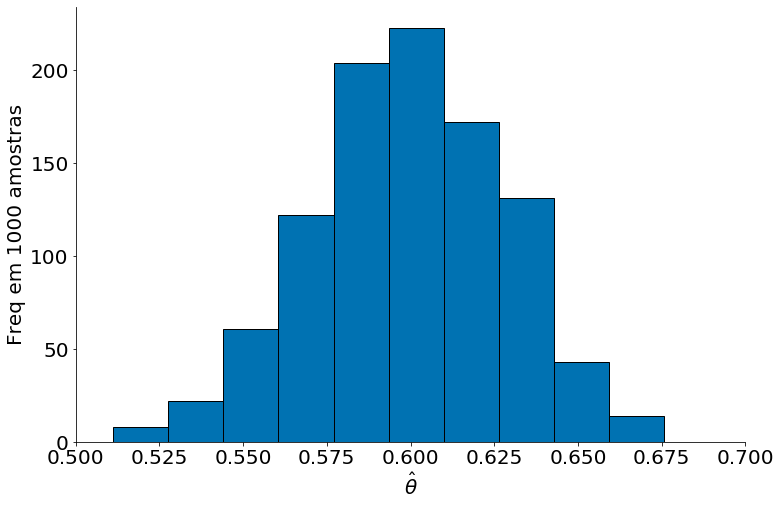

In [10]:
plt.hist(estimativas, edgecolor='k');
plt.xlabel(r'$\hat{\theta}$')
plt.ylabel('Freq em 1000 amostras')
plt.xlim(.5, .7)
despine()

Agora vamos fazer um estimador com amostras de tamanho 10000. Observe como estamos mais perto do valor real. É esperado, pela lei dos grandes números, quanto maior a quantidade de dados mais perto ficamos.

In [11]:
estimativas = []
for _ in range(1000):
    data = np.random.beta(3, 2, size=10000)
    estimativas.append(data.mean())

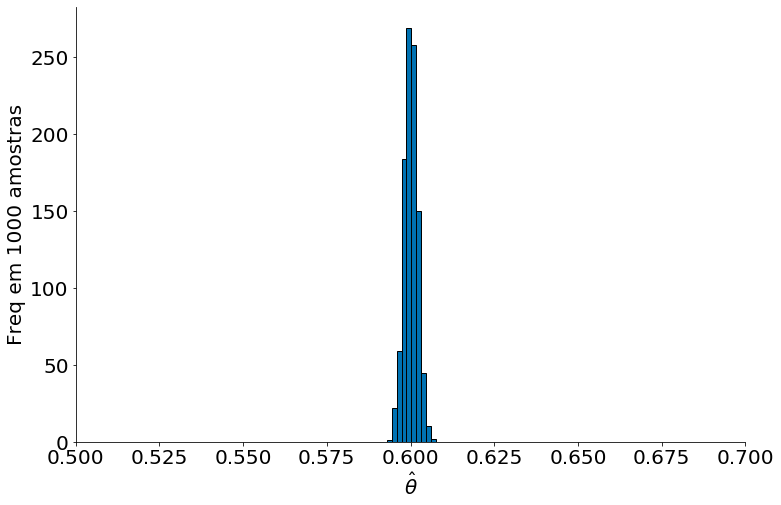

In [12]:
plt.hist(estimativas, edgecolor='k');
plt.xlabel(r'$\hat{\theta}$')
plt.ylabel('Freq em 1000 amostras')
plt.xlim(.5, .7)
despine()